<a href="https://colab.research.google.com/github/leo96code/Digging_into_CNNs/blob/main/CNN_Birds_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
from tensorflow import keras

In [3]:
from keras.layers import Input, Conv2D
from keras.layers import MaxPool2D, Flatten, Dense
from keras import Model

#1. VGG16

In [16]:
def vgg16():

  model = keras.models.Sequential()
  input = Input(shape = (224,224,3))
  #1st conv block
  model.add(Conv2D( input_shape = (224, 224, 3), filters =64, kernel_size =3, padding = 'same', activation ='relu'))
  model.add(Conv2D( filters =64 , kernel_size =3, padding ='same', activation ='relu'))
  model.add(MaxPool2D( pool_size =2, strides =2, padding='same'))

  #2nd conv block
  model.add(Conv2D( filters =128, kernel_size =3, padding ='same', activation ='relu'))
  model.add(Conv2D( filters =128, kernel_size =3, padding ='same', activation ='relu'))
  model.add(MaxPool2D( pool_size =2, strides =2, padding ='same'))

  #3rd ConvBlock
  model.add(Conv2D( filters =256, kernel_size =3, padding ='same', activation ='relu'))
  model.add(Conv2D( filters =256, kernel_size =3, padding ='same', activation ='relu'))
  model.add(Conv2D( filters =256, kernel_size =3, padding ='same', activation ='relu'))
  model.add(MaxPool2D( pool_size =2, strides =2, padding ='same'))

  #4th ConvBlock
  model.add(Conv2D( filters=512, kernel_size =3, padding ='same', activation = 'relu'))
  model.add(Conv2D( filters=512, kernel_size =3, padding ='same', activation ='relu'))
  model.add(Conv2D( filters=512, kernel_size =3, padding ='same', activation = 'relu'))
  model.add(MaxPool2D(pool_size =2, strides =2, padding ='same'))

  #5th ConvBlock
  model.add(Conv2D( filters=512, kernel_size =3, padding ='same', activation = 'relu'))
  model.add(Conv2D( filters=512, kernel_size =3, padding ='same', activation ='relu'))
  model.add(Conv2D( filters=512, kernel_size =3, padding ='same', activation = 'relu'))
  model.add(MaxPool2D(pool_size =2, strides =2, padding ='same'))

  #FCLs
  model.add(Flatten())
  model.add(Dense( units = 4096, activation ='relu'))
  model.add(Dense( units =4096, activation ='relu'))
  model.add(Dense( units =315, activation ='softmax'))

  return model

In [17]:
vgg = vgg16()
vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

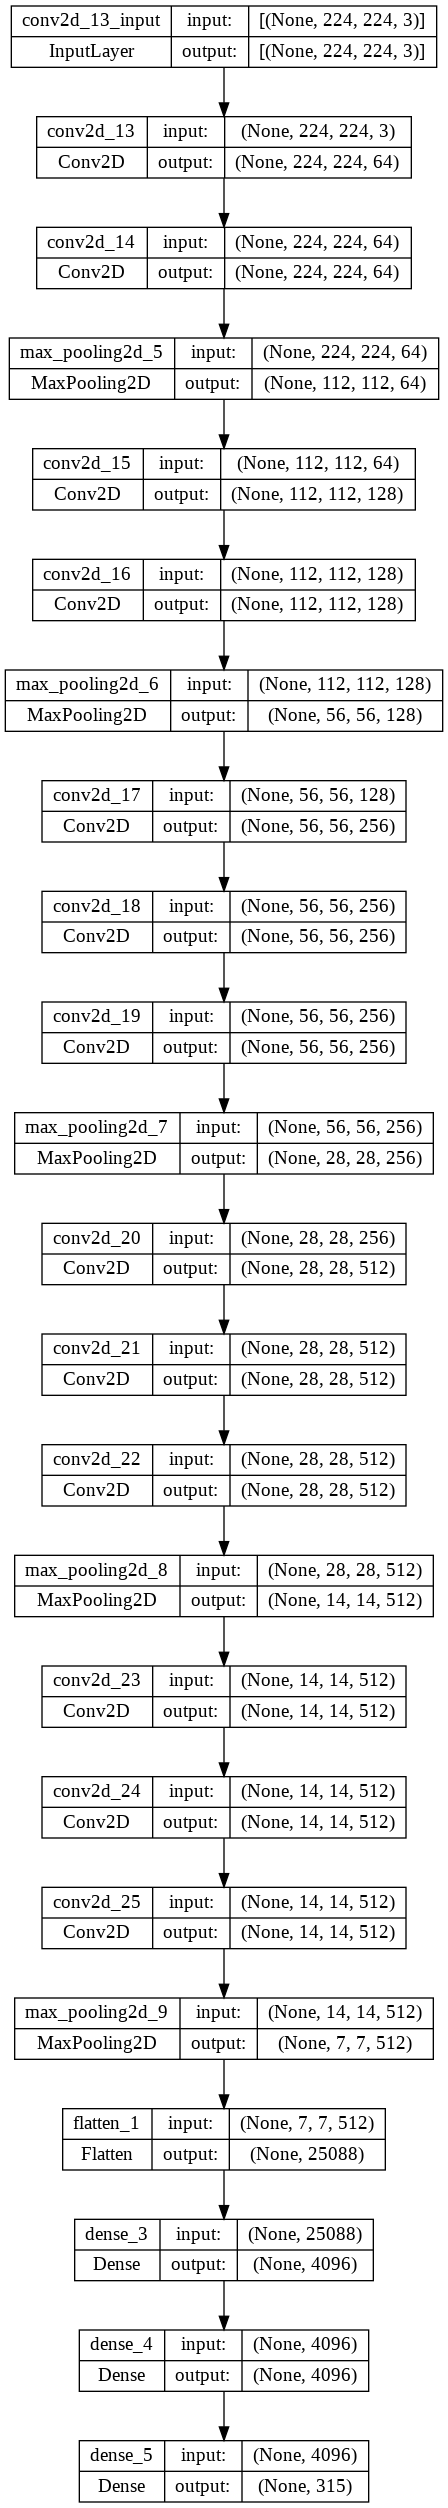

In [18]:
dot_img_file = '/tmp/model_1.png'
keras.utils.plot_model(vgg, to_file=dot_img_file, show_shapes=True)
#plot_model(model, show_layer_names=True, show_shapes=True, rankdir='TB', to_file='vgg.png')

In [19]:
vgg.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), 
            loss = keras.losses.categorical_crossentropy, 
            metrics=['accuracy'] 
            )

In [20]:
import os
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

trainX = ImageDataGenerator()
trndata = trainX.flow_from_directory(directory = '/content/drive/MyDrive/birds/train', target_size = (224, 224))

testX = ImageDataGenerator()
tstdata = testX.flow_from_directory(directory='/content/drive/MyDrive/birds/test', target_size = (224, 224))


Found 46000 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


In [21]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, save_weights_only = False, mode='auto')
earlystop = EarlyStopping(monitor = 'val_acc', min_delta=0, patience = 20, verbose = 1, mode = 'auto')


hist = vgg.fit(trndata, validation_data=tstdata, batch_size=60, epochs = 100, callbacks = [checkpoint, earlystop])

Epoch 1/100
 858/1438 [================>.............] - ETA: 1:04:34 - loss: 13.7011 - accuracy: 0.0044

KeyboardInterrupt: ignored